## Plot Cruise Maps

- python>=3.6
- using cartopy (basemap is deprecated)

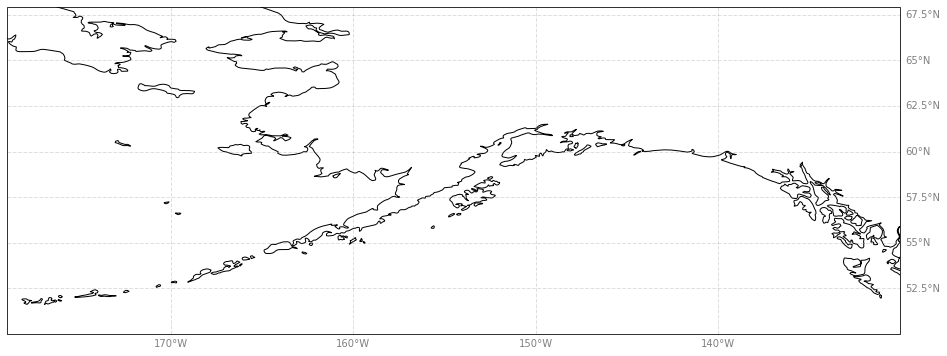

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cmocean

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 16),
                           subplot_kw=dict(projection=projection))
    if (projection == ccrs.PlateCarree()) or (projection == ccrs.Mercator()):
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=1., color='gray', alpha=0.25, linestyle='--')
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.ylabel_style = {'size': 10, 'color': 'gray'}
        gl.xlabel_style = {'size': 10, 'color': 'gray'}
    return fig, ax

projection=ccrs.LambertConformal(central_longitude=-160.0)
projection=ccrs.Mercator()
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

dx = dy = 0.5
extent = [-179, -130, 50, 66]
fig,ax = make_map(projection=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

### Pull bathymetry from erddap

In [10]:
#using xarray for data read
import xarray as xa
import cmocean

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 

bathy_sub = bathy.sel(latitude=slice(74,52),longitude=slice(-179,-140))

In [11]:
bathy_sub

<xarray.Dataset>
Dimensions:    (latitude: 3080, longitude: 2340)
Coordinates:
  * latitude   (latitude) float32 73.99607 73.99147 ... 52.01556 52.005302
  * longitude  (longitude) float32 -178.99167 -178.975 ... -140.025 -140.00833
Data variables:
    topo       (latitude, longitude) int16 ...
Attributes:
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_email:              jjbecker@ucsd.edu, dsandwell@ucsd.edu
    Easternmost_Easting:        179.9917
    geospatial_lat_max:         80.738
    geospatial_lat_min:         -80.738
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         179.9917
    geospatial_lon_min:         -179.9917
    geospatial_lon_resolution:  0.016666669753229318
    geospatial_lon_units:       degrees_east
    history:                    28-Apr-2008: Converted to NetCDF using gdal_t...
    infoUrl:                    https://topex.ucsd.edu/marine_topo/mar_topo.html
    institution:                UCSD
    keywords:                   altitude, arc, atmosphere, Earth Science > Oc...
    keywords_vocabulary:        GCMD Science Keywords
    license:                    David T. Sandwell, Walter H. F. Smith, and Jo...
    naming_authority:           gov.noaa.pfeg.coastwatch
    Northernmost_Northing:      80.738
    references:                 Smith, W. H. F. and D. Sandwell, Global seafl...
    sourceUrl:                  https://geoport.whoi.edu/thredds/dodsC/bathy/...
    Southernmost_Northing:      -80.738
    standard_name_vocabulary:   CF Standard Name Table v70
    summary:                    Global seafloor topography from satellite alt...
    title:                      Topography, Smith & Sandwell v11.1, 1/60-degree
    Westernmost_Easting:        -179.9917

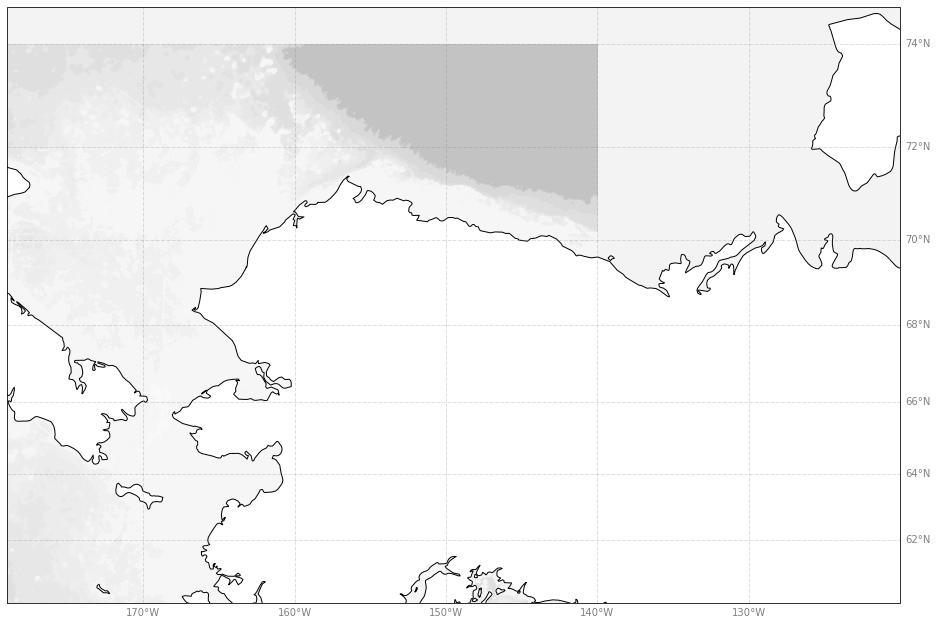

In [12]:
dx = dy = 0.5
extent = [-179, -120, 60, 72.5]
fig,ax = make_map(projection=projection)

#ax.plot(df['longitude'], df['latitude'], 'b', label=alamo, transform=transformation)
#ax.plot(df['longitude'], df['latitude'], '+k', markersize=1, label=alamo, transform=transformation)
#ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, cmap=cmocean.cm.deep_r,
#         transform=transformation)
ax.contourf(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, 
            levels=[-2000, -1000, -200, -100, -70, -50,], 
            colors=('#000000','#737373','#969696','#bdbdbd','#d9d9d9','#f0f0f0','#f8f8f8'), 
            extend='both', alpha=.75,
            transform=transformation)
#leg = ax.legend(bbox_to_anchor=(1.45,1), loc='upper right')

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

In [5]:
fig.savefig('FOCI_Bathy.png',dpi=300)

In [16]:
### Add data from excel
import pandas as pd

path = 'data/'
ops = pd.read_excel(path + 'Table 1_2020 cruise track aug13.xlsx')


/Users/bell/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bell/anaconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


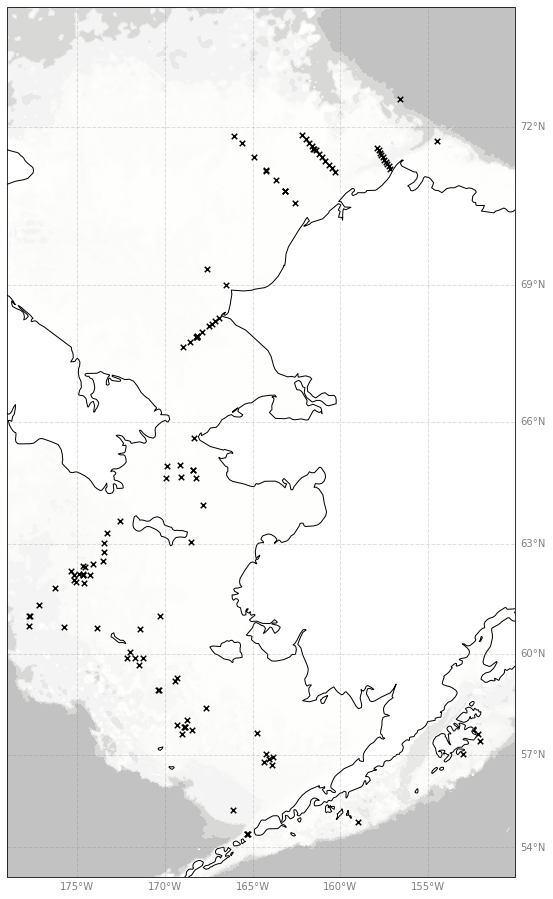

In [18]:
dx = dy = 0.5
extent = [-179, -150, 53, 73.5]
fig,ax = make_map(projection=projection)

ax.contourf(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, 
            levels=[-1000, -200, -100, -70, -50,], 
            cmap=cmocean.cm.gray,
#            colors=('#000000','#737373','#969696','#bdbdbd','#f0f0f0','#f8f8f8'), 
            extend='both', alpha=.65,
            transform=transformation)
ax.scatter(ops.Long, ops.Lat, s=30, color='black', marker='x',
                               transform=transformation)
#ax.plot(ops.Long, ops.Lat, transform=transformation)

ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

In [9]:
fig.savefig('Arctic.png',dpi=300)

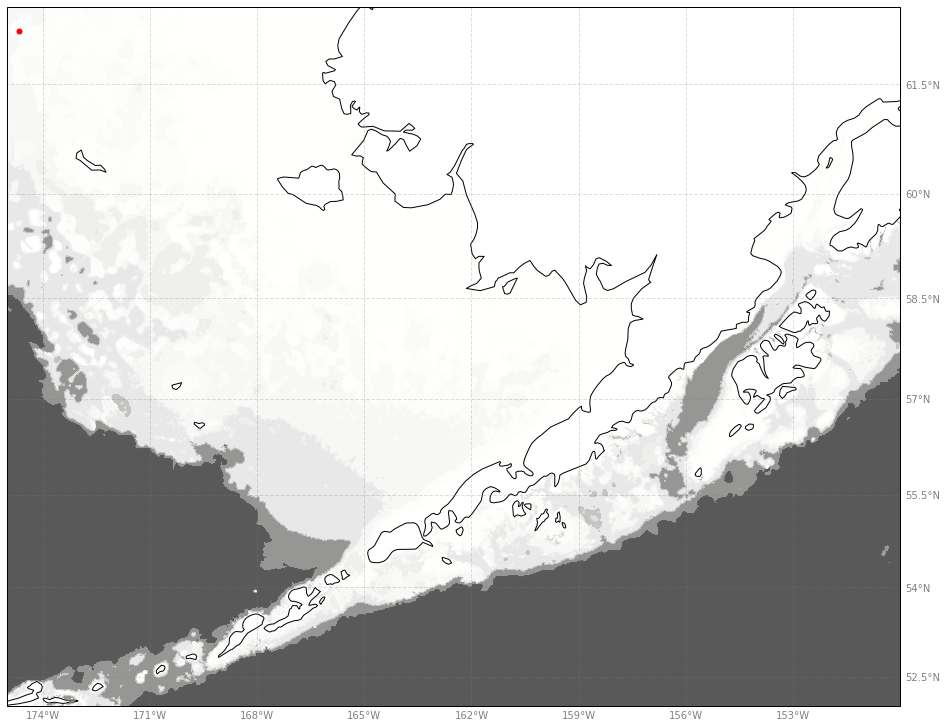

In [19]:
dx = dy = 0.5
extent = [-175, -150, 52, 62]
fig,ax = make_map(projection=projection)

ax.contourf(bathy_sub.longitude, bathy_sub.latitude, bathy_sub.topo, 
            levels=[-1000, -200, -100, -70, -50,], 
            cmap=cmocean.cm.gray,
#            colors=('#000000','#737373','#969696','#bdbdbd','#f0f0f0','#f8f8f8'), 
            extend='both', alpha=.65,
            transform=transformation)
ax.scatter(ctddata.LonDD, ctddata.LatDD, s=30, color='black', marker='x',
                               transform=transformation)
ax.scatter(mooringdata.LonDD, mooringdata.LatDD, s=25, color='red', marker='o',
                               transform=transformation)


ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
ax.set_extent(extent)

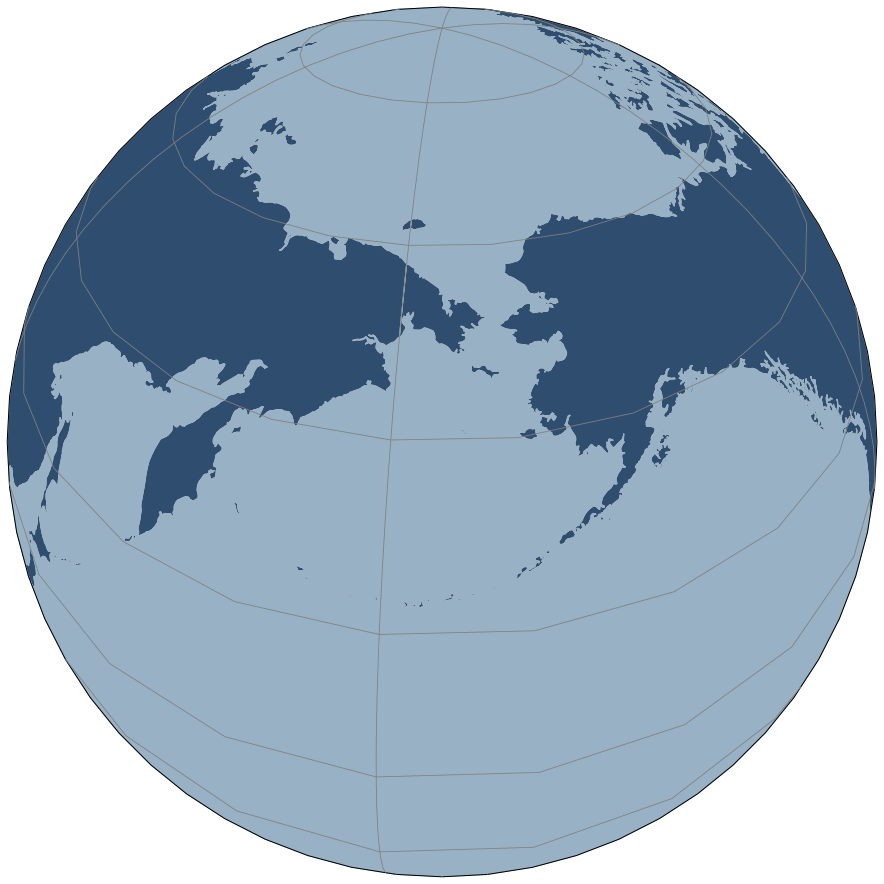

In [96]:
projection=ccrs.NearsidePerspective(central_longitude=-175.0,central_latitude=60,satellite_height=2000000)
fig,ax = make_map(projection=projection)

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='#CCCCCC', facecolor='#2F4E6F', alpha=1))
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='#98B1C4', alpha=1))
ax.gridlines(zorder=3,color='grey')
